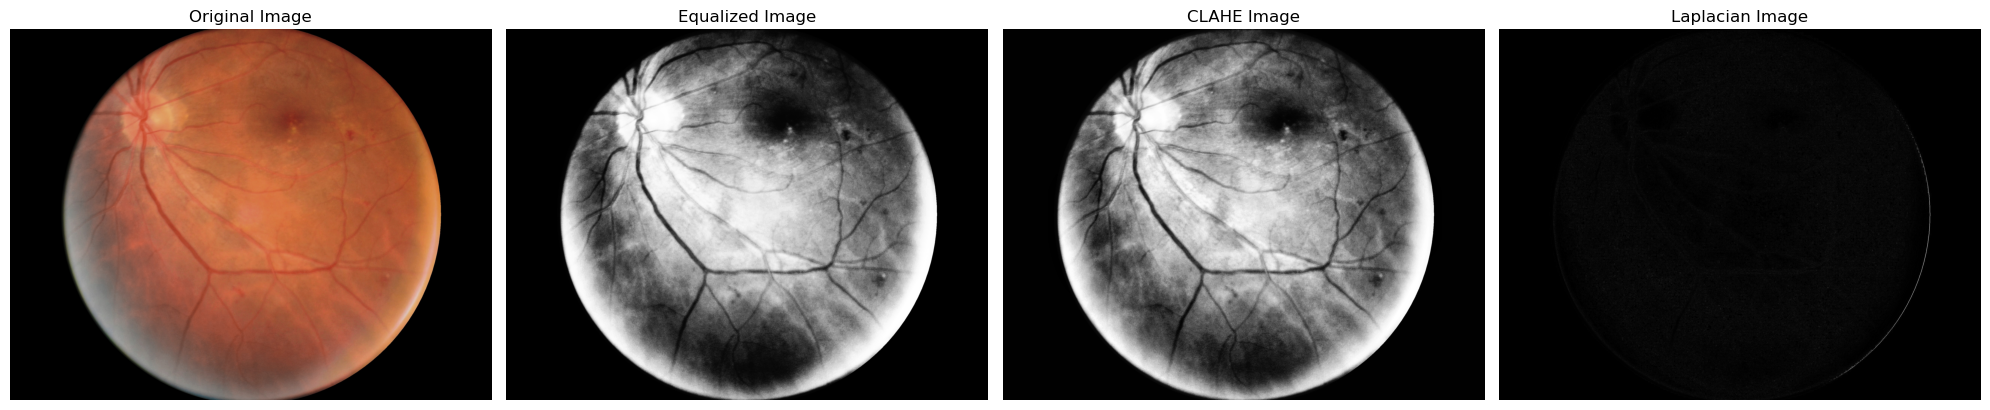

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histo_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray)
    return equalized_image

def apply_clahe(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        clahe_image = clahe.apply(image)

        return clahe_image
    
def apply_laplacian(image):
    laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_image = np.uint8(np.absolute(laplacian_image))
    return laplacian_image
    
image = cv2.imread('../data/image_4.jpg')
equalized_image = histo_equalization(image)
clahe_image = apply_clahe(equalized_image)
laplacien = apply_laplacian(clahe_image)


plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(laplacien, cmap='gray')
plt.title('Laplacian Image')
plt.axis('off')

plt.tight_layout()
plt.show()
